<img src="img/parties.png" alt="Democratic and Republican Party Logos">

<h1>Women in Congress</h1>

<p>When you begin to look at the demographics of Congress, one of the first things that stands out is that minorities have significantly less representation in comparison to causasion males. Despite this discrepency, a question that I wanted to answer is this: <b>Regarding women in Congress, what is the overall trend? Further, how does that trend break down when we compare political parties over time?</b> This notebook takes a look at the data and attempts to answer these questions.</p>

<h2>Sources:</h2>
<ul>
    <li><a href="https://www.brookings.edu/multi-chapter-report/vital-statistics-on-congress/" target="_blank">Brookings: Vital Statistics on Congress</a></li>
    <li><a href="http://cawp.rutgers.edu/women-us-house-representatives-2019" target="_blank">Rutgers: Women in the U.S. House of Representatives 2019</a></li>
    <li><a href="http://www.cawp.rutgers.edu/women-us-congress-2019" target="_blank">Rutgers: Women in the U.S. Congress 2019</a></li>
</ul>

<h3>Range of study: 1979-2019</h3>

<h2>Library Imports</h2>

<ul>
    <li><a href="https://pandas.pydata.org/" target="_blank">Pandas:</a> Used to convert and perform algorithms on the data presented from a CSV format.</li>
    <li><a href="https://matplotlib.org/" target="_blank">Matplotlib:</a> Used for creating and exporting visualizations.</li>
</ul>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, savefig

<h2>Custom Functions</h2>

<p>Custom functions for the study will be defined here.</p>

<h3>Pie Chart</h3>
<p>Creates, displays, and saves a pie chart plot customized to a donut plot.</p>
<b>Args:</b>
<ul>
    <li>dem_data: Data Frame containing the Democratic party data.</li>
    <li>rep_data: Data Frame containing the Republican party data.</li>
    <li>title: String containing the plot title.</li>
</ul>
<b>Returns:</b> None

<h3>Bar Chart</h3>
<p>Creates, displays, and saves a bar chart plot of the Women in Congress breakdown over time.</p>
<b>Args:</b>
<ul>
    <li>dem_data: Data Frame containing the Democratic party data.</li>
    <li>rep_data: Data Frame containing the Republican party data.</li>
    <li>title: String containing the plot title.</li>
</ul>
<b>Returns:</b> None

In [37]:
def pie_chart(dem_data, rep_data, title):
    pie_data = [dem_data['Member'].sum(), rep_data['Member'].sum()]
    plt.pie(pie_data, labels=['Democrat: ' + str(dem_data['Member'].sum()), 'Republican: ' + str(rep_data['Member'].sum())], colors=["Blue", "Red"], textprops={'fontsize': 20})
    plt.title(title, fontsize=30)
    plt.axis('equal')
    inner_circle = plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(inner_circle)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.draw()
    fig.savefig('plots/' + title + '.png', dpi=100)
    
def bar_chart(dem_data, rep_data, title):
    times = rep_data['Year']
    senate_r = pd.Series(rep_data['Member'].tolist(), index=times)
    senate_d = pd.Series(dem_data['Member'].tolist(), index=times)

    plot_df = pd.DataFrame({'Republican':senate_r, 'Democrat':senate_d})
    _ = plot_df.plot.bar(color=["Red", "Blue"], width=0.8, rot=0, title=title)
    _.set_xlabel("Year")
    _.set_ylabel("Members")
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.draw()
    fig.savefig('plots/' + title + '.png', dpi=100)

<h2>Data Import</h2>

<p>The range for this particular study begins with the 1979 Congressional class and extends to the current Congressional class. At the time of this study, the current year was 2019. The year 1979 was selected due to the origins of a meaningful trend. Up until that point, the women elected to congress were rare and did not show any meaningful trend due to the sparcity of women in Congress. The full dataset can be explored <a href="data/women_congress.csv">here</a>, however, any records prior to 1979 are not currently considered.</p>

<p><b>Note:</b> In the data set, if the number of women in Congress for a particular party was zero, it was represented with a period ('.'). These records were replaced with the integer 0.</p>

In [23]:
df = pd.read_csv('data/women_congress.csv').replace('.', 0).sort_values(by='Congress')
df['Member'] = pd.to_numeric(df['Member'])
df = df.loc[df['Year']>=1979]
df.head(10)

,Congress,Year,Chamber,Party,Member
126,96,1979,Senate,D,1
127,96,1979,Senate,R,1
124,96,1979,House,D,11
125,96,1979,House,R,5
131,97,1981,Senate,R,2
130,97,1981,Senate,D,0
128,97,1981,House,D,10
129,97,1981,House,R,9
132,98,1983,House,D,13
133,98,1983,House,R,9


<h2>Data Organization</h2>

<p>The first step in our process, after we select our date range, is to organize the data into usable pieces. For this study, we want to break down the data down by chamber and then by party. Finally, we sum the total number of women in each chamber regardless of their party affiliation</p>

<h3>Senate</h3>
<ul>
    <li><b>women_senate:</b> Data Frame containing each record of the number of women in the Senate, per class, regardless of political affiliation.</li>
    <li><b>tot_women_senate:</b> Integer of all of the women in the Senate from 1979-2019.</li>
    <li><b>women_senate_d:</b> Data Frame containing each record of the number of women in the Senate, per class, who were Democrats.</li>
    <li><b>women_senate_r:</b> Data Frame containing each record of the number of women in the Senate, per class, who were Republicans.</li>
</ul>
<h3>House of Representatives</h3>
<ul>
    <li><b>women_house:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, regardless of political affiliation.</li>
    <li><b>tot_women_house:</b> Integer of all of the women in the House of Representatives from 1979-2019.</li>
    <li><b>women_house_d:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, who were Democrats.</li>
    <li><b>women_house_r:</b> Data Frame containing each record of the number of women in the House of Representatives, per class, who were Republicans.</li>
</ul>

In [38]:
#Senate
women_senate = df.query("Chamber=='Senate'")
tot_women_senate = women_senate['Member'].sum()
women_senate_d = df.query("Chamber=='Senate' & Party=='D'")
women_senate_r = df.query("Chamber=='Senate' & Party=='R'")

#House
women_house = df.query("Chamber=='House'")
tot_women_house = women_house['Member'].sum()
women_house_d = df.query("Chamber=='House' & Party=='D'")
women_house_r = df.query("Chamber=='House' & Party=='R'")

Total women members of the House, Democrats: 783
Total women members of the House, Republicans: 324
Total women members of the House: 1107


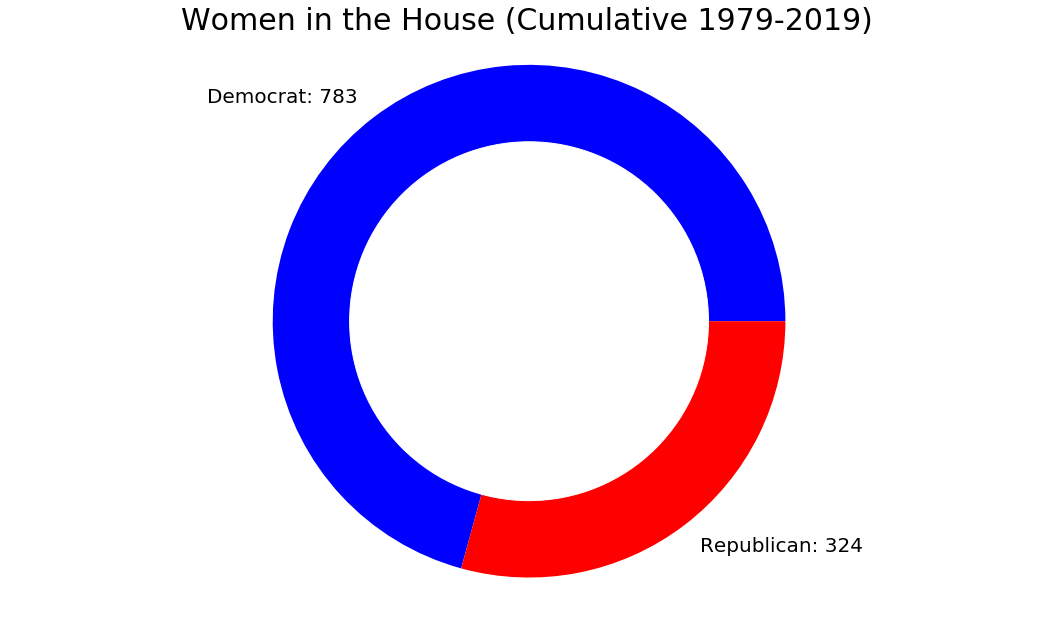

In [39]:
print('Total women members of the House, Democrats:', women_house_d['Member'].sum())
print('Total women members of the House, Republicans:', women_house_r['Member'].sum())
print('Total women members of the House:', tot_women_house)

pie_chart(women_house_d, women_house_r, 'Women in the House (Cumulative 1979-2019)')

Total women members of the Senate, Democrats: 153
Total women members of the Senate, Republicans: 70
Total women members of the Senate: 223


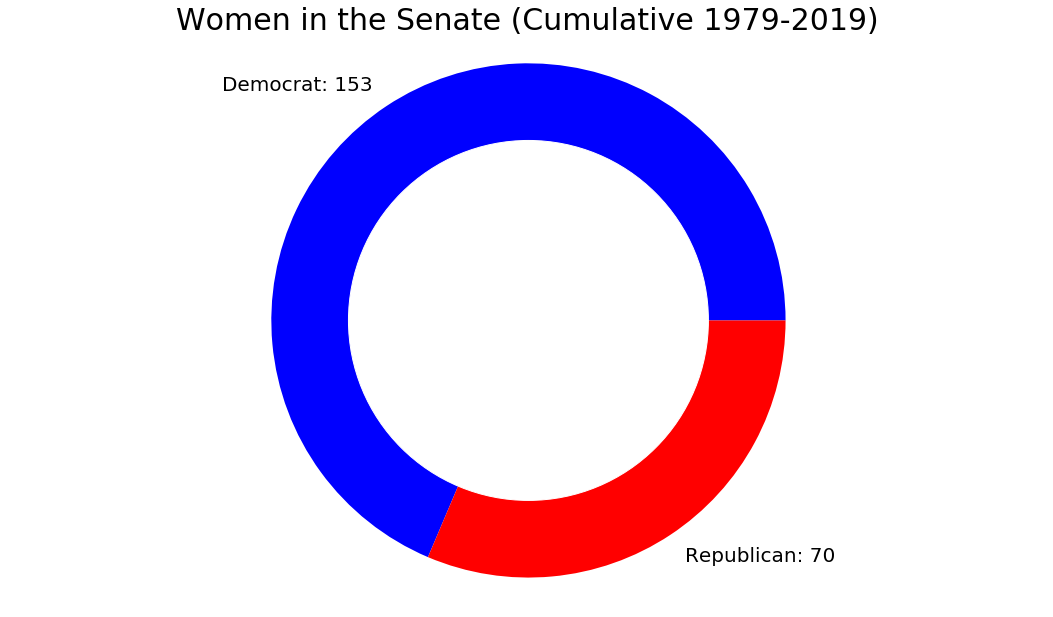

In [40]:
print('Total women members of the Senate, Democrats:', women_senate_d['Member'].sum())
print('Total women members of the Senate, Republicans:', women_senate_r['Member'].sum())
print('Total women members of the Senate:', tot_women_senate)

pie_chart(women_senate_d, women_senate_r, 'Women in the Senate (Cumulative 1979-2019)')

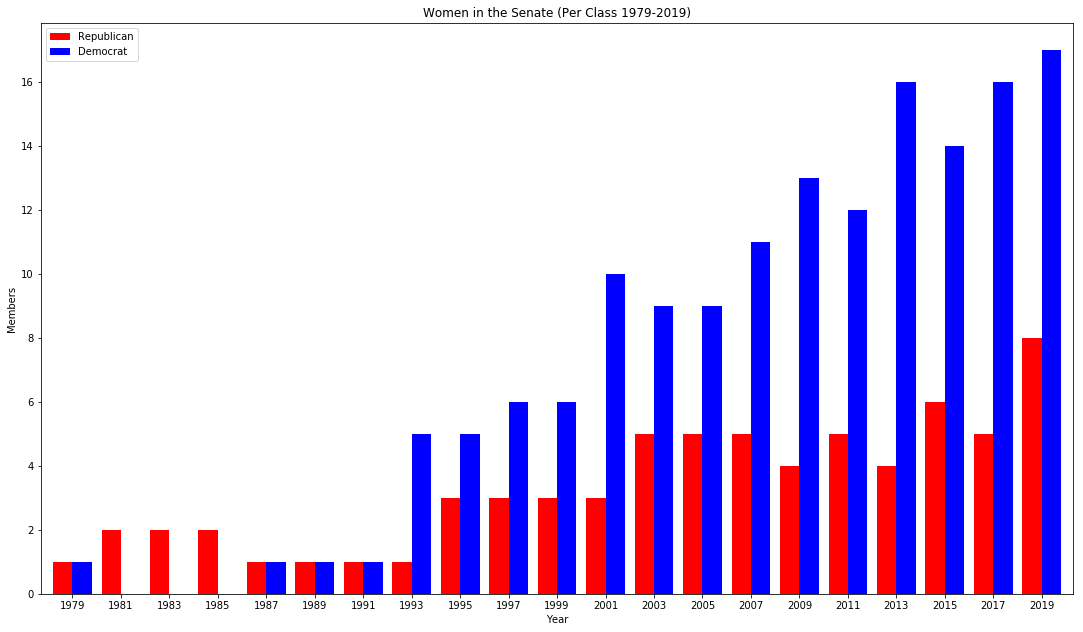

In [41]:
bar_chart(women_senate_d, women_senate_r, 'Women in the Senate (Per Class 1979-2019)')

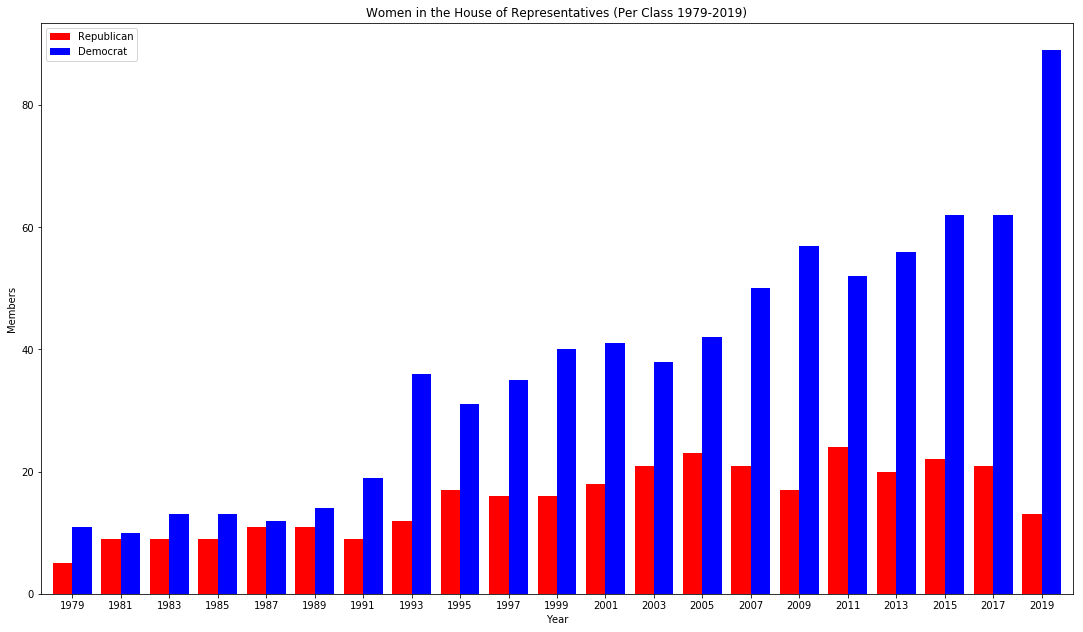

In [42]:
bar_chart(women_house_d, women_house_r, 'Women in the House of Representatives (Per Class 1979-2019)')